In [1]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from PIL import Image

In [2]:
TRAIN_IMAGES_PATH = "./data/crack_segmentation_dataset/train/images"
TRAIN_MASK_PATH = "./data/crack_segmentation_dataset/train/masks"
TEST_IMAGES_PATH = "./data/crack_segmentation_dataset/test/images"
TEST_MASK_PATH = "./data/crack_segmentation_dataset/test/masks"

In [3]:
train_names = os.listdir(TRAIN_IMAGES_PATH)
train_mask_names = os.listdir(TRAIN_MASK_PATH)

In [4]:
def extract_group_name(file_name:str):
    return "".join([ch.rstrip(".jpg") for ch in file_name if not ch.isdigit() and not ch in "_-"])

unique_train_names = np.unique([extract_group_name(name) for name in train_names])

In [5]:
grouped_train_names = {name: [] for name in unique_train_names}
for name in train_names:
    grouped_train_names[extract_group_name(name)].append(name)

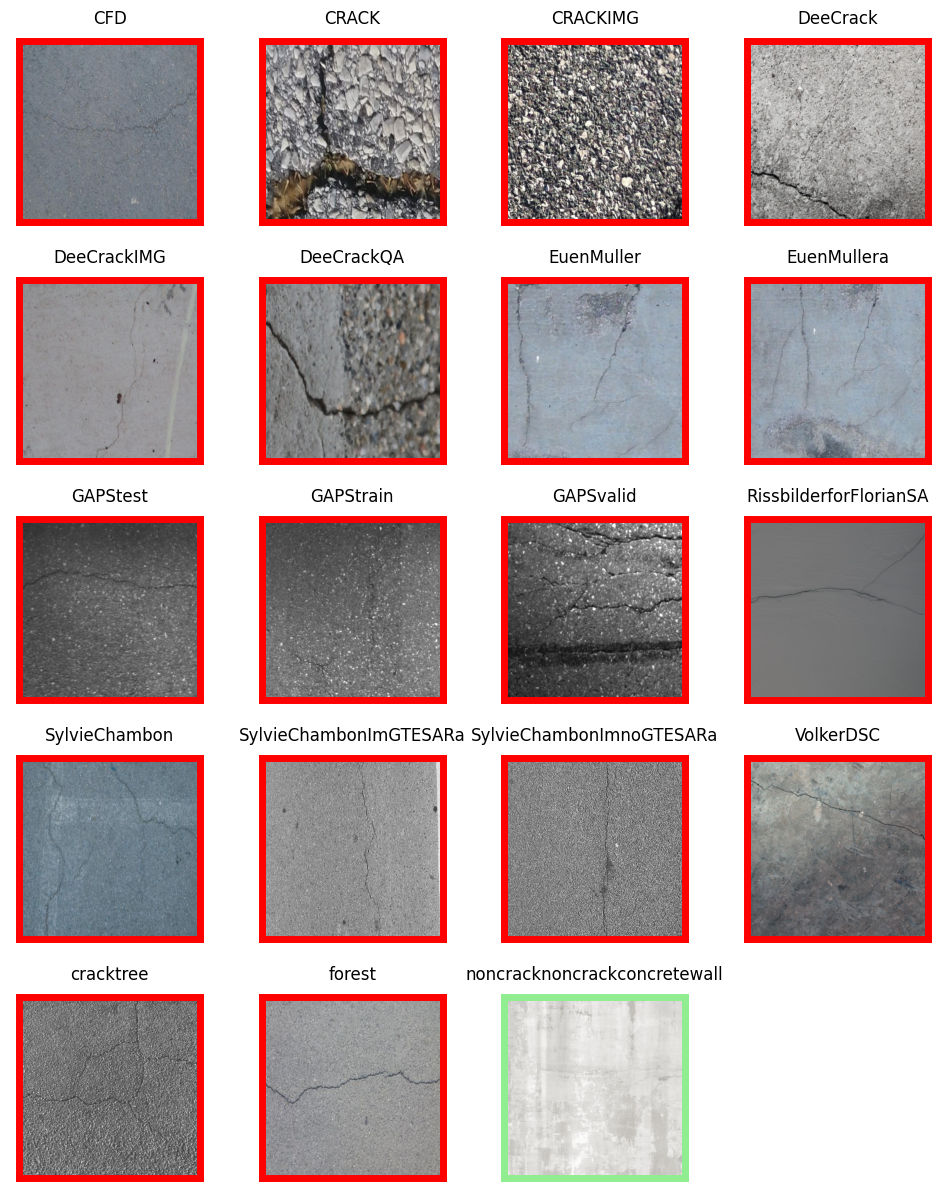

In [6]:
def is_craked(file_path:str):
    return np.array(Image.open(file_path)).sum() > 0

N_COLS = 4
N_ROWS = np.ceil(len(grouped_train_names) / N_COLS).astype("int32")

fig, ax = plt.subplots(ncols=N_COLS, nrows=N_ROWS, figsize=(N_COLS*3, N_ROWS*3))
for r in range(N_ROWS):
    for c in range(N_COLS):
        try:
            group_name = list(grouped_train_names.keys())[r*4+c]
        except:
            ax[r][c].axis(False)
            break

        sample_img_path = np.random.choice(grouped_train_names[group_name])
        sample_img = Image.open(f"{TRAIN_IMAGES_PATH}/{sample_img_path}")
        ax[r][c].imshow(sample_img)

        color = "red" if is_craked(f"{TRAIN_MASK_PATH}/{sample_img_path}") else "lightgreen"
        ax[r][c].plot([0-2.5, 448+2.5], [-2.5, -2.5], linewidth=5, color=color)
        ax[r][c].plot([0-2.5, 448+2.5], [448+2.5, 448+2.5], linewidth=5, color=color)
        ax[r][c].plot([0-2.5, 0-2.5], [0-2.5, 448+2.5], linewidth=5, color=color)
        ax[r][c].plot([448+2.5, 448+2.5], [0-2.5, 448+2.5], linewidth=5, color=color)

        ax[r][c].set_title(group_name)
        ax[r][c].axis(False)

plt.show()

(0.0, 3500.0)

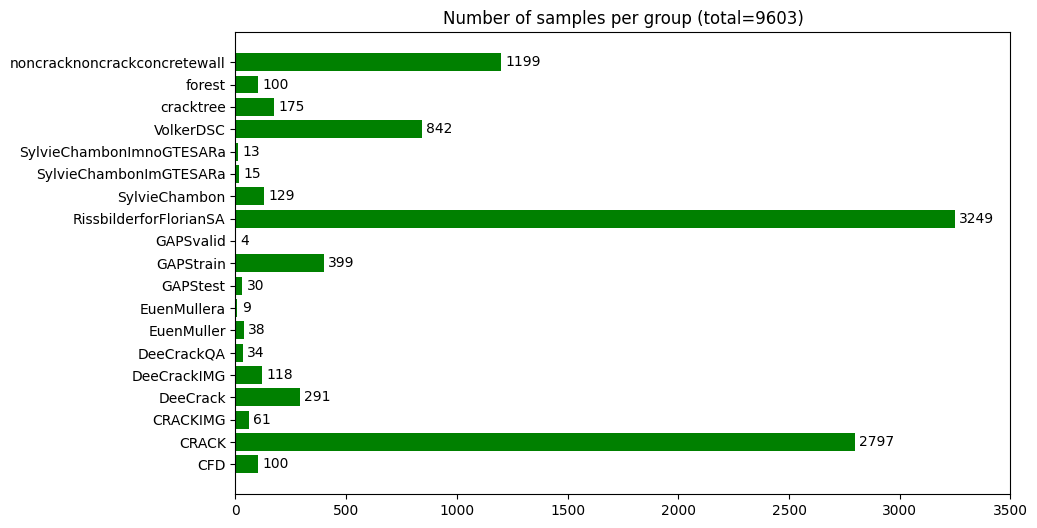

In [7]:
plt.figure(figsize=(10, 6))
total = 0
for i, (group_name, file_names) in enumerate(grouped_train_names.items()):
    plt.barh(group_name, len(file_names), label=group_name, color="green")
    plt.text(len(file_names)+20, i, str(len(file_names)), va="center")
    total += len(file_names)
plt.title(f"Number of samples per group (total={total})")
plt.xlim(0, 3500)